<a href="https://colab.research.google.com/github/Kaustav8/Coding-Project-Time-Series-Analysis-/blob/main/Coding_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####**IMPORTING REQUIRED LIBRARIES**

In [43]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#####**IMPORTING THE DATASET**

In [44]:
df = pd.read_csv('keywords_examples_us.csv')

#####**DATA AUDIT**

In [45]:
# First five rows of the dataset
df.head()

,keyword,sv,date
0,02 night marine lip gloss,10,2021-11-30
1,02 night marine lip gloss,20,2021-10-31
2,02 night marine lip gloss,10,2021-09-30
3,02 night marine lip gloss,20,2021-08-31
4,02 night marine lip gloss,0,2019-07-31


In [46]:
# Last five rows
df.tail()

,keyword,sv,date
325051,zoeva lip gloss,0,2019-02-28
325052,zoeva lip gloss,10,2019-03-31
325053,zoeva lip gloss,10,2019-04-30
325054,zoeva lip gloss,10,2019-05-31
325055,zoeva lip gloss,10,2019-06-30


In [47]:
# To find exact number of records
df.shape

(325056, 3)

In [48]:
# A consise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325056 entries, 0 to 325055
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  325056 non-null  object
 1   sv       325056 non-null  int64 
 2   date     325056 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.4+ MB


In [49]:
# Converting 'date' column to datetime format
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True) 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325056 entries, 0 to 325055
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   keyword  325056 non-null  object        
 1   sv       325056 non-null  int64         
 2   date     325056 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.4+ MB


In [51]:
# Checking Missing values
df.isnull().sum()

keyword    0
sv         0
date       0
dtype: int64

So here in this dataset there are no missing values

In [52]:
# Getting descriptive statistics summary of the dataset
df.describe() 

,sv
count,325056.000000
mean,191.956555
std,2067.482649
min,0.000000
25%,0.000000
50%,10.000000
75%,70.000000
max,301000.000000


#####**EXPLORATORY DATA ANALYSIS OF THE DATASET**

######**Overall keyword search trend**

In [53]:
# Start date of these records
df['date'].min()

Timestamp('2017-12-31 00:00:00')

In [54]:
# End date of these records
df['date'].max()

Timestamp('2021-11-30 00:00:00')

In [55]:
# Extracting the month year from the dataset
df['month_year'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

In [56]:
# Extracting the year from the dataset
df['year'] = df['date'].apply(lambda x: x.strftime('%Y'))

In [57]:
# Grouping month year
df_trend = df.groupby('month_year').sum()['sv'].reset_index()

In [58]:
# Grouping year
df_trend2 = df.groupby('year').sum()['sv'].reset_index()

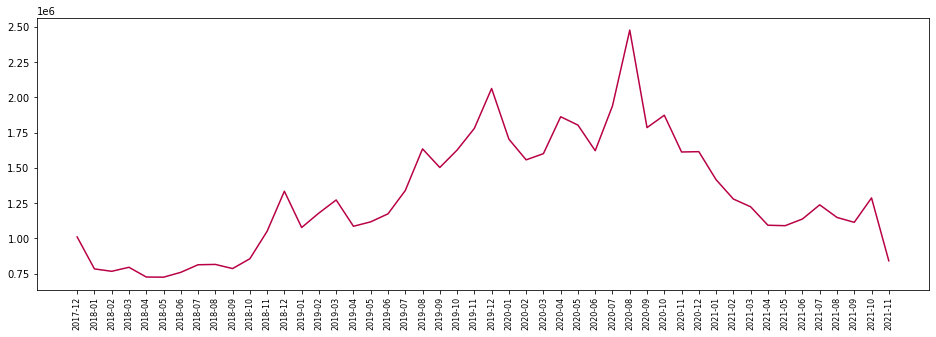

In [59]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_trend['month_year'], df_trend['sv'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

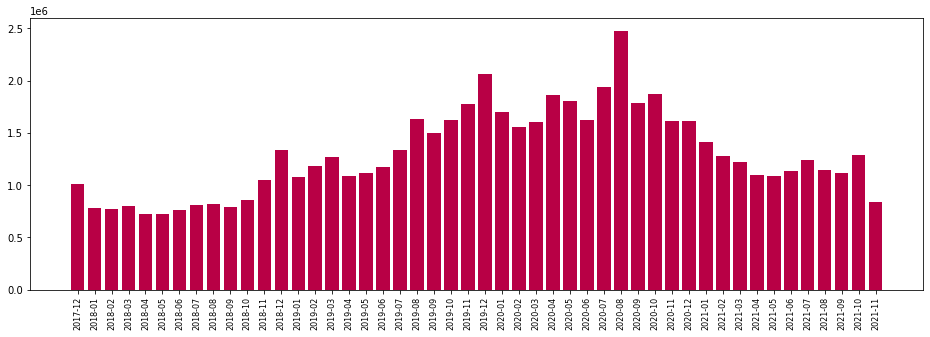

In [60]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.bar(df_trend['month_year'], df_trend['sv'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

By analyzing the above plot we can see that during the initial few months the trend of search is quite low. It is most high at september 2020

#####**Top 25 Keywords by Search Volume**

In [61]:
df.head(8)

,keyword,sv,date,month_year,year
0,02 night marine lip gloss,10,2021-11-30,2021-11,2021
1,02 night marine lip gloss,20,2021-10-31,2021-10,2021
2,02 night marine lip gloss,10,2021-09-30,2021-09,2021
3,02 night marine lip gloss,20,2021-08-31,2021-08,2021
4,02 night marine lip gloss,0,2019-07-31,2019-07,2019
5,02 night marine lip gloss,0,2019-06-30,2019-06,2019
6,02 night marine lip gloss,0,2019-05-31,2019-05,2019
7,02 night marine lip gloss,0,2019-04-30,2019-04,2019


In [62]:
# Grouping keywords by search volume
keyword_search = pd.DataFrame(df.groupby('keyword').sum()['sv'])

In [63]:
# Sorting the dataframe in descending order
keyword_search.sort_values(by=['sv'], inplace=True, ascending=False)

In [64]:
# Top 25 keywords by search volume
keyword_search[:25]

,sv
keyword,
lipgloss,4734000
lip plumper,1964900
euphoriamakeup,1630080
euphoria makeup,1630080
plumping lip gloss,1436600
fake tattoo,1366500
city lips,1162600
clear lip gloss,1077000
buxom lip gloss,982100


In [65]:
type(keyword_search)

pandas.core.frame.DataFrame

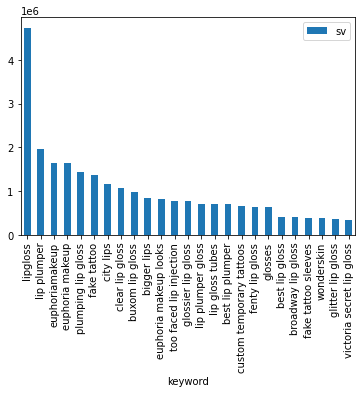

In [66]:
# Bar plot of top 25 most searched keywords with respect to search volume
keyword_search[:25].plot(kind="bar")